# Softmax regression

In this exercise you will train a softmax regression model to recognize handwritten digits.
  
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{1,...,c\}$ is the target (in our case we have ten classes, so $c=10$),
* for a given $x$ we model the probability of $y=j$ by $$h(x)_j=p_j = \frac{e^{w_j^Tx}}{\sum_{i=1}^c e^{w_i^Tx}},$$
* to find the right $w$ we will optimize the so called multiclass log loss:
$$L(y,p) = \log{p_y},$$
$$J(w) = -\frac{1}{n}\sum_{i=1}^n L(y_i,h(x)),$$
* with the loss function in hand we can improve our guesses iteratively:
    * $w_{ij}^{t+1} = w_{ij}^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_{ij}}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with importing the MNIST dataset.

In [ ]:
!wget -O mnist.npz https://s3.amazonaws.com/img-datasets/mnist.npz

--2021-04-12 21:17:47--  https://s3.amazonaws.com/img-datasets/mnist.npz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.233.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.233.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz’

mnist.npz           100%[===================>]  10.96M  71.9MB/s    in 0.2s    

2021-04-12 21:17:47 (71.9 MB/s) - ‘mnist.npz’ saved [11490434/11490434]



In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def load_mnist(path='mnist.npz'):
    with np.load(path) as f:
        x_train, _y_train = f['x_train'], f['y_train']
        x_test, _y_test = f['x_test'], f['y_test']
        
    x_train = x_train.reshape(-1, 28 * 28) / 255.
    x_test = x_test.reshape(-1, 28 * 28) / 255.
    
    y_train = np.zeros((_y_train.shape[0], 10))
    y_train[np.arange(_y_train.shape[0]), _y_train] = 1
    
    y_test = np.zeros((_y_test.shape[0], 10))
    y_test[np.arange(_y_test.shape[0]), _y_test] = 1

    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_mnist()

Let's take a look at the data. In the "x" arrays you'll find the images (encoded as pixel intensities) and in the "y" ones you'll find the labels (one-hot encoded).

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_train[:10])
print(y_train[:10])

(60000, 784)
(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Now let us see the data in a more human way.

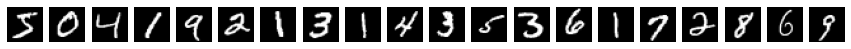

In [ ]:
num_samples = 20
samples = range(num_samples)
fig, subplots = plt.subplots(1, num_samples)
fig.set_size_inches(15, 15)

for i, s in enumerate(subplots.flatten()):
    s.imshow(np.reshape(x_train[i, :], [28, 28]), cmap='gray')
    s.axis('off')

Next, we prepare $X$ and $y$ variables

In [ ]:
X = x_train[:4000]
y = y_train[:4000]

print(X.shape)
print(y.shape)

(4000, 784)
(4000, 10)


To train the model we will (obviously) use gradient descent. Inside the loop we need a method to compute the gradients. Let's start with implementing it, together with some helper functions.

In [ ]:
# We will store the weights in a D x c matrix, where D is the number of features, and c is the number of classes
#weights = (...) # TODO: Fill in, be sure to have the right shape!
weights = np.random.rand(X.shape[1], y.shape[1])



def softmax(z):
    return (np.exp(z).T /np.sum(np.exp(z),axis=1)).T

def softmaxv(z):
    return np.exp(z) / sum(np.exp(z))

def predictv(weights, X):
    return softmaxv(np.dot(X, weights))

def predict(weights, X):
    ###################################
    # TODO: compute the probabilities #
    ###################################
    return softmax(np.dot(X, weights))

from numpy import linalg as LA
def compute_loss_and_gradients(weights, X, y, l2_reg):
    #############################################################################
    # TODO: compute loss and gradients, don't forget to include regularization! #
    #############################################################################
    #loss = 0
    #grad = 0
    m = X.shape[1]
    #loss1 =0 
    #for i in range(m):
    #  loss1 += np.dot(y[i], np.transpose(np.log(predictv(weights, X[i])))) 
    #loss1 = - loss1 / m  + l2_reg * np.sum(weights**2)
    #print(loss1)
      #+ l2_reg.np.sum(weights**2)
      #+ l2_reg* LA.norm(weights,2)
    #loss = loss / m 
    #loss = -np.trace(np.dot(np.log(predict(weights, X)), y))/ y.shape[0] + l2_reg * np.sum(weights**2)
    #loss bez 
    loss = -np.trace(np.dot(np.log(predict(weights, X)), y.T))/y.shape[0] + l2_reg * np.sum(weights**2)
    #+ l2_reg* np.sum(weights**2) 
    #grad1 = np.zeros([X.shape[1], 10])
    #for i in range(m):
    #    for k in range(10):
    #      grad1[i,k] =  np.sum(X[i]*((y[i][k] - predict(weights,X[i])[k])))
    
    #grad = grad + l2_reg * weights
    #grad = -np.dot(X.T, y - pred) / y.shape[0] l2_reg * weights
    #grad = -np.dot(X.T, (y.T-predict(weights, X)).T) / y.shape[0] + l2_reg*weights
    grad = -np.dot(X.T, y - predict(weights, X)) / y.shape[0] + l2_reg*weights
    # pochodna loss z wagami
    #grad1 = np.zeros([X.shape[1], 10])
    #for i in range(X.shape[0]):
    #  grad1 += np.outer(X[i], (y-predict(weights, X))[i])

    #grad1 = -grad1 / X.shape[0]
    #print(grad1)


    return loss, grad
    

We are now in position to complete the training pipeline.

If you have problems with convergence, be sure to check the gradients numerically.

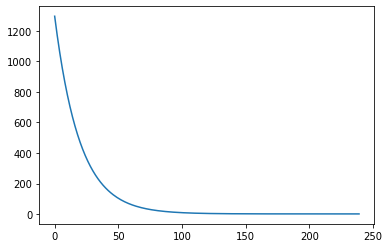

In [ ]:
l2_reg = 0.5
n_epochs = 240
lr = 0.05

losses = []
for i in range(n_epochs):
    loss, grad = compute_loss_and_gradients(weights, X, y, l2_reg)
    losses.append(loss)
    
    weights -= lr * grad

plt.plot(losses)



Now compute your accuracy on the training and test sets.

In [ ]:
##############################
# TODO: compute the accuracy #
##############################

In [ ]:
def accuracy(y_pred, y_acc):
  correct = 0
  total = 0
  for i in range(len(y_pred)):
      act_label = np.argmax(y_acc[i]) # act_label = 1 (index)
      pred_label = np.argmax(y_pred[i]) # pred_label = 1 (index)
      if(act_label == pred_label):
          correct += 1
      total += 1
  accuracy = (correct/total)
  return accuracy

In [ ]:
y_pred = predict(weights, X)
accuracy(y_pred, y)

0.822

We can also visualize the weights learned by our algorithm. Try to anticipate the result before executing the cell below.

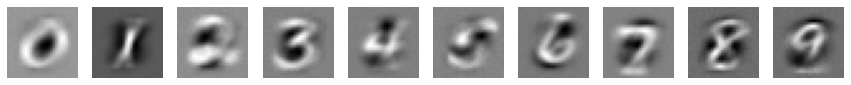

In [ ]:
fig, subplots = plt.subplots(1, 10)
fig.set_size_inches(15, 15)

for i, s in enumerate(subplots.flatten()):
    s.imshow(np.reshape(np.array(weights[:, i]), [28, 28]), cmap='gray')
    s.axis('off')

Note that we only used a small portion of the data to develop the model. Now, implement the training on full data. Also, validate your model properly and find a good value for `l2_reg` hyperparameter. Try to experiment with `batch_size`.

In [ ]:
################################################
# TODO: implement the proper training pipeline #
################################################

def fit(X, y, l2_reg=0.5, n_epochs=250, lr=0.5, batch_size=X.shape[0]):
  weights = np.random.rand(X.shape[1], y.shape[1])
  losses = []
  for i in range(n_epochs):
    for j in range(0, X.shape[0], batch_size):
      loss, grad = compute_loss_and_gradients(weights, X[j:j+batch_size], y[j:j+batch_size], l2_reg)
      losses.append(loss)
      
      weights -= lr * grad
  return weights, losses




In [ ]:
weights, losses = fit(x_train[:8000], y_train[:8000], n_epochs=10)
y_pred = predict(weights, X)
accuracy(y_pred, y)
print(y_pred.shape)
print(y.shape)


(4000, 10)
(4000, 10)


In [ ]:
from sklearn.model_selection import KFold

def cross_validation_split(X, y, l2_reg, n_epochs, lr, n_splits=10, batch_size=X.shape[0]):
  kfold =KFold(n_splits=n_splits)
  accuracies = []
  for train_index, test_index in kfold.split(X, y):  
      x_train_fold = X[train_index] 
      y_train_fold = y[train_index] 
      x_test_fold = X[test_index] 
      y_test_fold = y[test_index] 

      
      weights, losses = fit(x_train_fold, y_train_fold, l2_reg, n_epochs, lr)
      
      y_pred = predict(weights, x_test_fold)

      accuracies.append(accuracy(y_pred, y_test_fold))
  return accuracies
    
     

In [ ]:
print(np.mean(cross_validation_split(X, y, l2_reg=0.5, n_epochs=10, lr=0.5, n_splits=10)))

0.71375


### Hyperparameter optimization

In [ ]:
X = x_train[:4000]
y = y_train[:4000]
l2_reg_space = np.linspace(0.1, 0.9, num=3)
lr_space = np.linspace(0.1, 0.9, num=3)
batch_size = 100
n_epochs = 250
for lr in lr_space:
  for l2 in l2_reg_space:
    #for batch in range(10, 100, 10):
    print(np.mean(cross_validation_split(X, y, l2_reg=l2, n_epochs=n_epochs, lr=lr, n_splits=10, batch_size=100)))
    print({"lr":lr, "l2":l2})



KeyboardInterrupt: ignored

In [ ]:
X = x_train[:2000]
y = y_train[:2000]
l2_reg_space = np.linspace(0.1, 0.9, num=3)
lr_space = np.linspace(0.1, 0.9, num=3)
batch_size = 100
n_epochs = 250
for lr in lr_space:
  for l2 in l2_reg_space:
    for batch in range(25, 100, 25):
      print(np.mean(cross_validation_split(X, y, l2_reg=l2, n_epochs=n_epochs, lr=lr, n_splits=10, batch_size=batch)))
      print({"lr":lr, "l2":l2, "batch_size": batch})



KeyboardInterrupt: ignored

In [ ]:
#Agrad 

l2_reg = 0.001
n_epochs = 16
batch_size = 1000
num_batches = x_train.shape[0] // batch_size
eta = 0.1
eps = 10 ** (-8)

weighs = np.zeros([x_train.shape[1], 10])

G = np.zeros(weighs.shape)
losses = []


loss, grad = compute_loss_and_gradients(weights, X, y, l2_reg)
